#How different schools of philosophy affect writing format?



In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/GR5243/philosophy_data.csv')

#If upload data manually, please use the code below to read data
#df=pd.read_csv('philosophy_data.csv') 

Mounted at /content/drive


The dataset contains texts from 10 major schools of philosophy: Plato, Aristotle, Rationalism, Empiricism, German Idealism, Communism, Capitalism, Phenomenology, Continental Philosophy, and Analytic Philosophy.

The first thing coming to my mind is how this school or author different than each other. Is there anyone prefer long sentences? Does one specific school of author prefer more words in one article? 

After thinking about all of these questions, **I assume the length of the document or the length of sentences is affected by different schools.** Intuitively, the idea of different schools will definitely be different from each other, therefore the best way to identify the school of a document is to look at their **thesis** or the author. However, is this the only way to determine it? I don't think so. The school of a philosophy document can also be dertemined by the ***writing format***. 

Let's start to look at some general plots to know how these philosophy documents looks like. This is a violin plot for the distribution of **number of word per sentence for each school**. As we can see, most of the sentences contain less than 300 words. The school **"plato"**, **"analytic"** and **"nietzsche"** seem to has documents that are consist mainly of lots of **short sentences**, while the others tend to be consist mainly of **longer sentences**. 



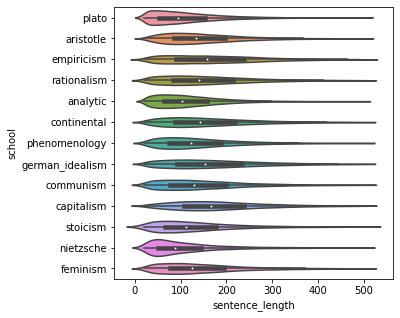

In [21]:
#@title
plt.figure(figsize=(5,5))
df_1=df[df["sentence_length"]<=500]
sns.violinplot(data=df_1,x="sentence_length", y="school")

Below this paragraph, there is a plot about the average number of words per sentences for each school. The school **"analytic"**, **"nietzsche"**,**"plato"** has the **least** average number of words per sentences. This results is consistent with our observations from violin plot. The school **"capitalism"**,**"empiricism"**,**"german_idealism"** has the **greatest** average number of words per sentences. 

Text(0.5, 1.0, 'The average number of words \n per sentence for each school')

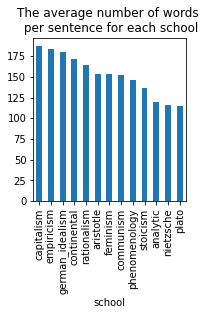

In [22]:
#@title
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
a=df.groupby(['school']).mean()["sentence_length"]
a=a.sort_values(ascending=False)
a.plot(kind='bar')
plt.title("The average number of words \n per sentence for each school")
# The average number of words in each sentence for each school

The below graphs are about average number of sentences and total number of words per document for each school. There are also two plots talking about the same thing after removing **"aristotle"** and **"plato"**, since these two schools have the value way larger than others. 

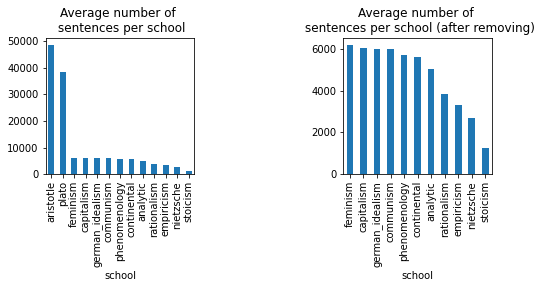

In [3]:
#@title
plt.figure(figsize=(8,2.5))
plt.subplot(1,2,1)
a=df.groupby(['school','title']).count().iloc[:,0].groupby('school').mean()
a=a.sort_values(ascending=False)
a.plot(kind='bar')
plt.title("Average number of \n sentences per school")

plt.subplot(1,2,2)
new_df=df[(df["school"]!="plato")&(df["school"]!="aristotle")]
a=new_df.groupby(['school','title']).count().iloc[:,0].groupby('school').mean()
a=a.sort_values(ascending=False)
a.plot(kind='bar')
plt.title("Average number of \n sentences per school (after removing)")
plt.subplots_adjust(wspace=1)
#After removing plato and aristotle, the new plot of average number of sentences per school

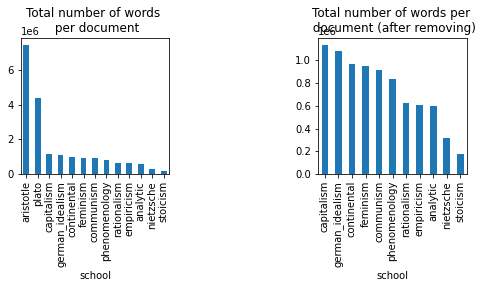

In [4]:
#@title
plt.figure(figsize=(8,2.5))
plt.subplot(1,2,1)
a=pd.DataFrame(df.groupby(['school','title']).sum()["sentence_length"].groupby('school').mean())["sentence_length"]
a=a.sort_values(ascending=False)
a.plot(kind='bar')
plt.title("Total number of words \n per document")

plt.subplot(1,2,2)
a=pd.DataFrame(new_df.groupby(['school','title']).sum()["sentence_length"].groupby('school').mean())["sentence_length"]
a=a.sort_values(ascending=False)
a.plot(kind='bar')
plt.title("Total number of words per \n document (after removing)")
plt.subplots_adjust(wspace=1)

Here are some interesting findings: 

*   The school "nietzsche" and "stoicism" has the lowest value for all of the three scores (**"average number of word per sentence", "average number of sentences", "total number of words per document"**).
*   Although the school **"plato"** has very large value for **"average number of sentences"** and **"total number of words per document"**, it has the lowest value for **"average number of word per sentences"**
*   For the plot of average number of sentences for each school, most of the school has average number of sentences less than 10,000 except **"plato"** and **"aristotle"**. Those two are also way large than the others.
*   The school **"capitalism"**, **"continental"** and **"german_idealism"** prefer not only long sentences but also more sentences. 








From these plots, we can classify schools into three categories: **small, medium and large**. For example, for the **average number of words per sentence** for each school, most of the document from each school has mean number of words per sentences from 125 to 175, which is medium. However, the schools **"analytics"**, **"nietzsche"**, **"plato"** has the number smaller than 125, which is small. The schools **"capitalism"**, **"empiricism"**, **"german_idealism"** has the number bigger than 175, which is large. 

For the school with less number of words per sentences, the school **"analytic"** is reasonable, since from the word analytic, for analysis, people always give a proposition that is necessarily true independent of fact or experience. People will write less thing based on emotions. For the school **"plato"**, the document consists of daily conversation between people. In daily conversation, people don't usually contain too much information in only one sentence.

According to the level of **average number of word per sentences, total number of word and average number of sentences for each school**, I can classifiy all of the schools into three categories: **small, medium and large**. With this heatmap table below, if the values of these three features of one document with unknown class is given, we are able to determine which class it belongs to. 

In [25]:
#@title
a=pd.DataFrame(df.groupby(['school']).mean()["sentence_length"])#mean number of words per sentences per school
b=pd.DataFrame(df.groupby(['school','title']).sum()["sentence_length"].groupby('school').mean())#total num of words per school
c=pd.DataFrame(df.groupby(['school','title']).count().iloc[:,0].groupby('school').mean())#mean num of sentences per school
table=pd.concat([a,b,c], axis=1)
table.columns=['avg_num_word_per_sen','total_num_word','avg_num_sen']
#first column
for i in range(13):
  if table.iloc[i,0]<125:
    table.iloc[i,0]="Small"
  elif table.iloc[i,0]>175:
    table.iloc[i,0]="Large"
  else: 
    table.iloc[i,0]="Medium"
#second column
for i in range(13):
  if table.iloc[i,1]<0.6*(10**6):
    table.iloc[i,1]="Small"
  elif table.iloc[i,1]>2*(10**6):
    table.iloc[i,1]="Large"
  else: 
    table.iloc[i,1]="Medium"
#third column
for i in range(13):
  if table.iloc[i,2]<4000:
    table.iloc[i,2]="Small"
  elif table.iloc[i,2]>10000:
    table.iloc[i,2]="Large"
  else: 
    table.iloc[i,2]="Medium"

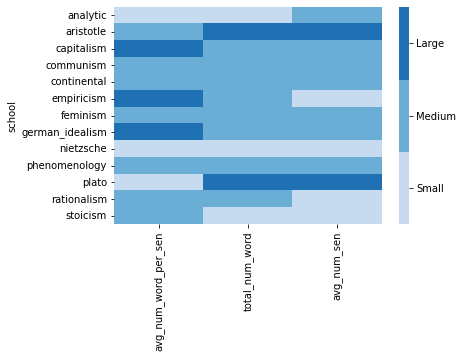

In [26]:
#@title
plt.figure(figsize=(6,4))
value_to_int = {j:i for i,j in enumerate(pd.unique(table.values.ravel()))}
n = len(value_to_int)
cmap = sns.color_palette("Blues", n) 
ax = sns.heatmap(table.replace(value_to_int), cmap=cmap)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                         
plt.show()

After looking at all of these plot, it is very obvious that the documents from different school of philosophy have different format. Some of them prefer short sentences, while others prefer long sentences. Some of them prefer very long document, while others prefer the short one. We can definitely classifiy or identify these different types of schools according to some numerical value like what I have mentioned above. However, these are not just numbers, different format are also showing different way of thinking, different emotions and different attitudes. Furthur investigation may needed to identify these things.